In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [2]:
df=pd.read_csv("Train_Test_IoT_Modbus.csv")

In [3]:
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal


In [4]:
df.describe()

,ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label
count,5.110600e+04,51106.000000,51106.000000,51106.000000,51106.000000,51106.000000
mean,1.554802e+09,32757.773627,32777.699879,32503.208743,32828.110594,0.315149
std,1.038530e+06,18882.845454,19013.367817,18917.049504,18864.069304,0.464580
min,1.554061e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.554061e+09,16500.000000,16436.000000,16290.000000,16495.000000,0.000000
50%,1.554160e+09,32450.000000,32708.000000,32035.000000,32728.000000,0.000000
75%,1.556211e+09,49033.000000,49235.000000,48826.000000,48979.250000,1.000000
max,1.556480e+09,65527.000000,65535.000000,65525.000000,65534.000000,1.000000


In [5]:
df.isnull().sum()

ts                           0
date                         0
time                         0
FC1_Read_Input_Register      0
FC2_Read_Discrete_Value      0
FC3_Read_Holding_Register    0
FC4_Read_Coil                0
label                        0
type                         0
dtype: int64

In [6]:
df['label'].value_counts()

0    35000
1    16106
Name: label, dtype: int64

In [7]:
df['type'].value_counts()

normal       35000
password      5000
backdoor      5000
injection     5000
xss            577
scanning       529
Name: type, dtype: int64

In [8]:
num_msg= df.shape[0]
num_AttOrNormal = len(df["label"].unique()) 
name_AttOrNormal = ["0: Normal " , " 1: attack "]

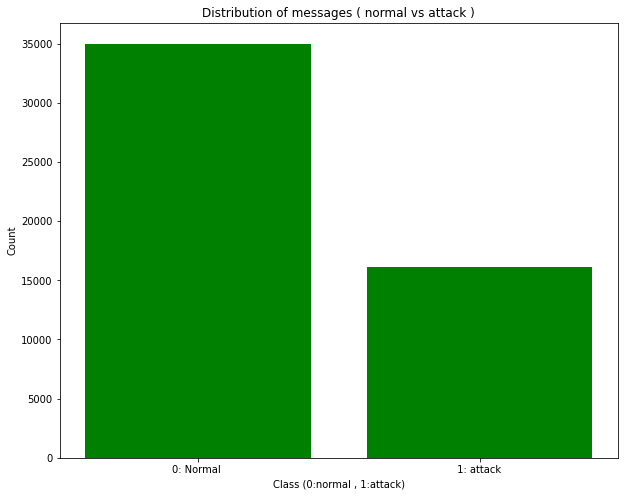

In [9]:
Count_per_classAttOrNormal = df["label"].value_counts()
percentage_per_classAttOrNormal = Count_per_classAttOrNormal*100/num_msg

fig = plt.figure(figsize=(10, 8))
bar_plot = plt.bar(name_AttOrNormal,Count_per_classAttOrNormal,color='green')


plt.xlabel('Class (0:normal , 1:attack)')
plt.ylabel('Count')
plt.title('Distribution of messages ( normal vs attack )')
plt.show()

In [10]:
len(df["type"].unique())

6

In [11]:
name_class=['normal','backdoor', 'password',  'injection', 'xss' ,'scanning']

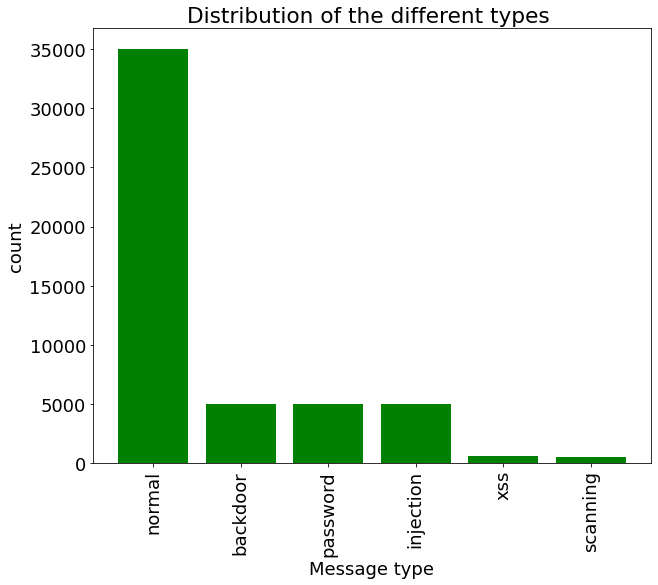

In [12]:
Count_per_class = df["type"].value_counts()

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 8))
bar_plot = plt.bar(name_class,Count_per_class,color='green')

plt.xticks(rotation=90)
plt.xlabel("Message type")
plt.ylabel("count")

plt.title('Distribution of the different types ')
plt.show()

## Label Encoding

In [13]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['labelCode'] = labelencoder.fit_transform(df['type'])
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,labelCode
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection,1
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection,1
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection,1
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection,1
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection,1
...,...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal,2
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal,2
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal,2
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal,2


## Each Class Code equivalent

In [14]:
label_keys=df["type"].unique()
label_values=df["labelCode"].unique()
labels = {label_keys[i]: label_values[i] for i in range(len(label_keys))}
labels

{'injection': 1,
 'backdoor': 0,
 'normal': 2,
 'password': 3,
 'scanning': 4,
 'xss': 5}

In [15]:
X=df[["FC1_Read_Input_Register","FC2_Read_Discrete_Value","FC3_Read_Holding_Register","FC4_Read_Coil"]]
y=df["labelCode"]

In [16]:
from sklearn.preprocessing import StandardScaler
 

 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
X=scaler.fit_transform(X)

X

array([[ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       [ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       [ 0.8807671 ,  1.05943867, -0.35593683, -1.01798282],
       ...,
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568],
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568],
       [-1.72432128,  0.28865764,  0.06056983,  0.62372568]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))

Train Data size: 40884
Test Data size 10222


In [18]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train.values)

GaussianNB()

In [19]:
y_pred = nb.predict(X_test)
y_train_pred=nb.predict(X_train)

In [20]:
from sklearn import metrics
print("The RF model accuracy for the training set is: ", metrics.accuracy_score(y_train,y_train_pred)*100)
print("The RF model accuracy for the test set is: ", metrics.accuracy_score(y_test,y_pred)*100)

The RF model accuracy for the training set is:  68.39594951570297
The RF model accuracy for the test set is:  68.84171395030326



Test confusion_matrix


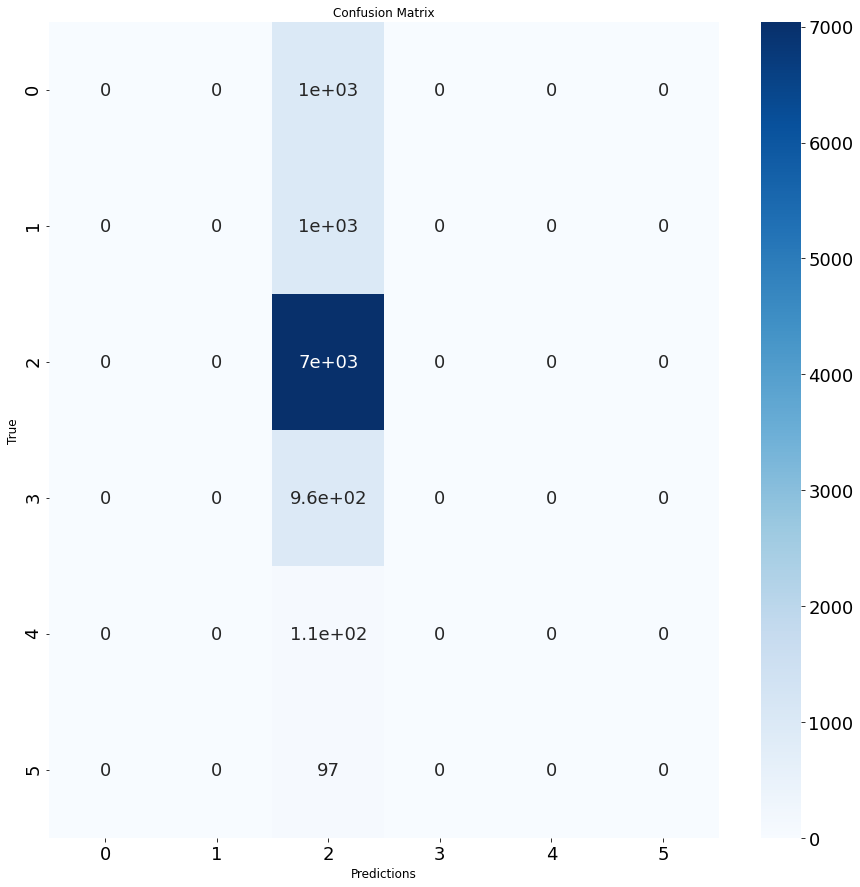

In [21]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
plt.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [22]:
y_test.value_counts()

2    7037
1    1009
0    1007
3     963
4     109
5      97
Name: labelCode, dtype: int64

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average=None)
precision = precision_score(y_test, y_pred , average=None)
f1 = f1_score(y_test, y_pred, average=None)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
recallList=recall.tolist()
precisionList=precision.tolist()
f1lList=f1.tolist()

In [25]:
name_class=['backdoor','injection','normal','password','scanning','xss']
name_class.sort()
name_class

['backdoor', 'injection', 'normal', 'password', 'scanning', 'xss']

In [26]:
recallDict={i:j for i,j in zip(name_class,recallList)}
precisionDict={i:j for i,j in zip(name_class,precisionList)}
f1Dict={i:j for i,j in zip(name_class,f1lList)}

## Average Recall

In [27]:
recallDict

{'backdoor': 0.0,
 'injection': 0.0,
 'normal': 1.0,
 'password': 0.0,
 'scanning': 0.0,
 'xss': 0.0}

## Average Precision

In [28]:
precisionDict

{'backdoor': 0.0,
 'injection': 0.0,
 'normal': 0.6884171395030326,
 'password': 0.0,
 'scanning': 0.0,
 'xss': 0.0}

## Average F1 Score

In [29]:
f1Dict

{'backdoor': 0.0,
 'injection': 0.0,
 'normal': 0.8154586013094618,
 'password': 0.0,
 'scanning': 0.0,
 'xss': 0.0}